### Garment Data EDA Process

Data set description:
- date : Date in MM-DD-YYYY
- day : Day of the Week
- quarter :	A portion of the month. A month was divided into four quarters
- department : Associated department with the instance
- team_no : Associated team number with the instance
- no_of_workers	: Number of workers in each team
- no_of_style_change : Number of changes in the style of a particular product
- targeted_productivity	: Targeted productivity set by the Authority for each team for each day.
- smv : Standard Minute Value, it is the allocated time for a task
- wip :	Work in progress. Includes the number of unfinished items for products
- over_time	: Represents the amount of overtime by each team in minutes
- incentive	: Represents the amount of financial incentive (in BDT / Bangladeshi Taka) that enables or motivates a particular course of action.
- idle_time	: The amount of time when the production was interrupted due to several reasons
- idle_men : The number of workers who were idle due to production interruption
- actual_productivity :	The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math

In [ ]:
garment = pd.read_csv(r'/content/drive/MyDrive/Final Year Research/data/garments_worker_productivity.csv')
garment.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


### 1. Checking the datatypes and NULL value counts

In [ ]:
garment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

#### 1.2 Data Cleaning

- The word sweing should be 'sewing'
- The word and the word finishing should end without a space

In [ ]:
garment = garment.replace(['finishing '], ['finishing'])
garment = garment.replace(['sweing'], ['sewing'])
garment.department.value_counts()

,count
department,
sewing,691
finishing,506


#### 1.2 Change the data types of Team and no of workers variabels

In [ ]:
# round the number of workers
# This will round up 30.5 to 31

# drop date column
# garment = garment.drop(['date'], axis = 1)

garment['no_of_workers'] = garment['no_of_workers'].apply(lambda x: math.ceil(x))
garment['no_of_workers'] = garment['no_of_workers'].astype(int)

garment['team'] = garment['team'].astype(object)
garment['wip'].fillna(0 ,inplace=True)
garment['wip'] = garment['wip'].astype(int)
garment['no_of_style_change'] = garment['no_of_style_change'].astype(str)

garment.loc[garment['targeted_productivity'] == 0.07, 'targeted_productivity'] = 0.7
garment.loc[garment['no_of_workers'] == 89, 'no_of_workers'] = 35

<ipython-input-6-0896ab6bf278>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  garment['wip'].fillna(0 ,inplace=True)


In [ ]:
garment.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108,7080,98,0.0,0,0,59,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0,960,0,0.0,0,0,8,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968,3660,50,0.0,0,0,31,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968,3660,50,0.0,0,0,31,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170,1920,50,0.0,0,0,56,0.800382


In [ ]:
garment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   int64  
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   object 
 13  no_of_workers          1197 non-null   int64  
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
# define categorical and numerical columns
numerical_features = [feature for feature in garment.columns if garment[feature].dtype != 'O']
categorical_features = [feature for feature in garment.columns if garment[feature].dtype == 'O']

print('we have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('we have {} categorical features: {}'.format(len(categorical_features), categorical_features))

we have 9 numerical features: ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']
we have 6 categorical features: ['date', 'quarter', 'department', 'day', 'team', 'no_of_style_change']


In [ ]:
for col in categorical_features:
  print(col)
  print(garment[col].unique())
  print('\n')

date
['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']


quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


department
['sewing' 'finishing']


day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


team
[8 1 11 12 6 7 2 3 9 10 5 4]


no_of_style_change
['0' '1' '2']




In [ ]:
categorical = ['date',"quarter", "department", "day", "team", 'no_of_style_change']
numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

In [ ]:
garment.describe().T

,count,mean,std,min,25%,50%,75%,max
targeted_productivity,1197.0,0.730159,0.096017,0.350000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1197.0,687.228070,1514.582341,0.000000,0.000000,586.000000,1083.000000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_workers,1197.0,34.623225,22.188292,2.000000,9.000000,34.000000,57.000000,60.000000
actual_productivity,1197.0,0.735091,0.174488,0.233705,0.650307,0.773333,0.850253,1.120437


In [ ]:
# zero count in the numerical features

zero_count = [len(garment[garment['targeted_productivity'] == 0]),
              len(garment[garment['smv'] == 0]),
              len(garment[garment['wip'] == 0]),
              len(garment[garment['over_time'] == 0]),
              len(garment[garment['incentive'] == 0]),
              len(garment[garment['idle_time'] == 0]),
              len(garment[garment['idle_men'] == 0]),
              len(garment[garment['no_of_workers'] == 0]),
              len(garment[garment['actual_productivity'] == 0])]

zero_count

[0, 0, 506, 31, 604, 1179, 1179, 0, 0]

In [ ]:
# Zeor counts in the numerical variables data frame
dict = {"numerical_feature": numerical_features, "zero_count": zero_count}
zero_count_dataset = pd.DataFrame(dict)
zero_count_dataset


,numerical_feature,zero_count
0,targeted_productivity,0
1,smv,0
2,wip,506
3,over_time,31
4,incentive,604
5,idle_time,1179
6,idle_men,1179
7,no_of_workers,0
8,actual_productivity,0


In [ ]:
# zero count percentage
zero_count_dataset['zero_percentatge'] = zero_count_dataset['zero_count'] / len(garment) * 100
zero_count_dataset

,numerical_feature,zero_count,zero_percentatge
0,targeted_productivity,0,0.000000
1,smv,0,0.000000
2,wip,506,42.272348
3,over_time,31,2.589808
4,incentive,604,50.459482
5,idle_time,1179,98.496241
6,idle_men,1179,98.496241
7,no_of_workers,0,0.000000
8,actual_productivity,0,0.000000


In [ ]:
# prompt: In need to check the normality of the numerical variables using shapiro wilk test. Should be in table format with skewness values, shapiro wilk text p values

from scipy.stats import shapiro

# Create an empty dictionary to store the results
normality_results = {}

# Iterate over the numerical features
for col in numerical:
    # Calculate skewness
    skewness = garment[col].skew()

    # Perform Shapiro-Wilk test
    stat, p = shapiro(garment[col])

    # Store the results in the dictionary
    normality_results[col] = {'skewness': skewness, 'shapiro_p': p}

# Convert the dictionary to a DataFrame for better visualization
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')
normality_df

,skewness,shapiro_p
targeted_productivity,-2.017093,1.742515e-40
smv,0.405937,1.581819e-31
wip,10.852386,2.866918e-55
over_time,0.673287,9.320973e-27
incentive,15.790746,1.612262e-58
idle_time,20.545425,8.131311e-61
idle_men,9.855079,1.048250e-59
no_of_workers,-0.119307,1.413279e-37
actual_productivity,-0.807492,6.871261e-21


Insights:
- when the production interrupted due to a reason, the actual_productivity was decreased from a significant amount
- Since the zero precentages of the idle_time, idle_men and no_of_style_change variables are too high I decided to remove those columns

In [ ]:
# categorical = ["quarter", "department", "day", "team"]
# numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  garment.boxplot(numerical_features[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical_features[i])}", , fontsize=16)
  ax.set_ylabel(numerical_features[i], fontsize=16)


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

SyntaxError: invalid syntax (<ipython-input-1-944b188e8d08>, line 13)

In [ ]:
# prompt: remove outliers from all the variable

# Calculate IQR for each numerical variable
Q1 = garment[numerical_features].quantile(0.25)
Q3 = garment[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
garment = garment[~((garment[numerical_features] < lower_bound) | (garment[numerical_features] > upper_bound)).any(axis=1)]

insights:
- This may cause due to  the small number of workers assigned to the team

In [ ]:
garment.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108,7080,98,0.0,0,0,59,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0,960,0,0.0,0,0,8,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968,3660,50,0.0,0,0,31,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968,3660,50,0.0,0,0,31,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170,1920,50,0.0,0,0,56,0.800382


In [ ]:
garment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1050 non-null   object 
 1   quarter                1050 non-null   object 
 2   department             1050 non-null   object 
 3   day                    1050 non-null   object 
 4   team                   1050 non-null   object 
 5   targeted_productivity  1050 non-null   float64
 6   smv                    1050 non-null   float64
 7   wip                    1050 non-null   int64  
 8   over_time              1050 non-null   int64  
 9   incentive              1050 non-null   int64  
 10  idle_time              1050 non-null   float64
 11  idle_men               1050 non-null   int64  
 12  no_of_style_change     1050 non-null   object 
 13  no_of_workers          1050 non-null   int64  
 14  actual_productivity    1050 non-null   float64
dtypes: float6

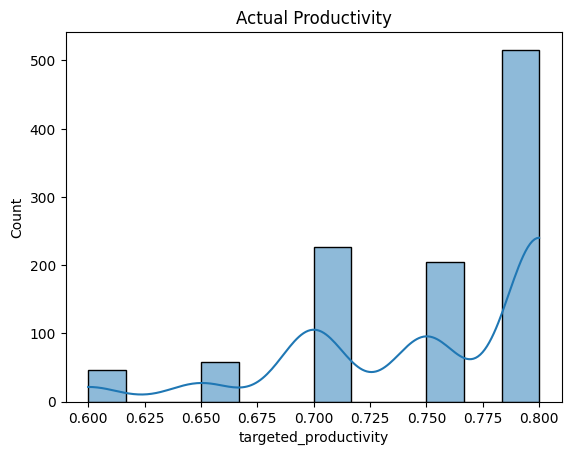

In [ ]:
import seaborn as sns
ax = sns.histplot(garment.targeted_productivity, kde=True)
ax.set_title("Actual Productivity")
plt.show()

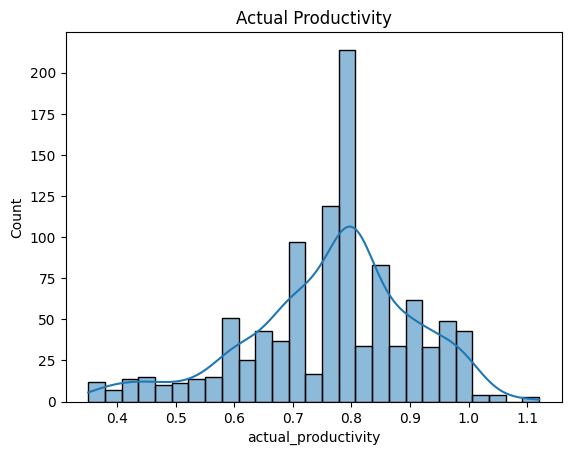

In [ ]:
import seaborn as sns
ax = sns.histplot(garment.actual_productivity, kde=True)
ax.set_title("Actual Productivity")
plt.show()

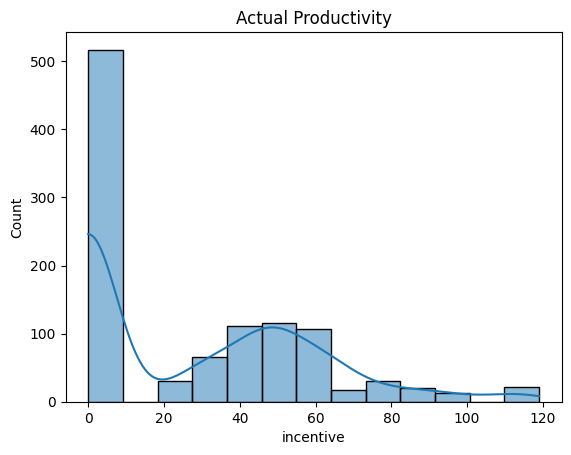

In [ ]:
import seaborn as sns
ax = sns.histplot(garment.incentive, kde=True)
ax.set_title("Actual Productivity")
plt.show()

## Sample Models try

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
X = garment.drop(columns = ['actual_productivity', 'date'], axis = 1)
y = garment['actual_productivity']

In [ ]:
X

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108,7080,98,0.0,0,0,59
1,Quarter1,finishing,Thursday,1,0.75,3.94,0,960,0,0.0,0,0,8
2,Quarter1,sewing,Thursday,11,0.80,11.41,968,3660,50,0.0,0,0,31
3,Quarter1,sewing,Thursday,12,0.80,11.41,968,3660,50,0.0,0,0,31
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170,1920,50,0.0,0,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,0,960,0,0.0,0,0,8
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,0,960,0,0.0,0,0,8
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,0,960,0,0.0,0,0,8
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,0,1800,0,0.0,0,0,15


In [ ]:
# create column transformer with 3 types of transformers

num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = MinMaxScaler()
one_hot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hot_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [ ]:
X_trans = preprocessor.fit_transform(X)

In [ ]:
X_trans.shape

(1050, 36)

In [ ]:
pd.DataFrame(print(X_trans))

[[1.         0.         0.         ... 0.         0.         0.98275862]
 [1.         0.         0.         ... 0.         0.         0.10344828]
 [1.         0.         0.         ... 0.         0.         0.5       ]
 ...
 [0.         1.         0.         ... 0.         0.         0.10344828]
 [0.         1.         0.         ... 0.         0.         0.22413793]
 [0.         1.         0.         ... 0.         0.         0.06896552]]


""


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((840, 36), (210, 36))

In [ ]:
# evaluation metric after model training
def model_evaluation(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = model_evaluation(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = model_evaluation(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1117
- Mean Absolute Error: 0.0799
- R2 Score: 0.3835
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1184
- Mean Absolute Error: 0.0820
- R2 Score: 0.2638


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.1422
- Mean Absolute Error: 0.1104
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1389
- Mean Absolute Error: 0.1046
- R2 Score: -0.0133


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1118
- Mean Absolute Error: 0.0797
- R2 Score: 0.3822
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1185
- Mean Absolute Error: 0.0820
- R2 Score: 0.2634


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0939
- Mean Absolute Error: 0.0638
- R2 Score: 0.5645
----------------------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.423949
5,Random Forest Regressor,0.362428
6,XGBRegressor,0.273758
0,Linear Regression,0.263845
2,Ridge,0.263361
8,AdaBoost Regressor,0.252382
3,K-Neighbors Regressor,0.212240
4,Decision Tree,0.036268
1,Lasso,-0.013302


In [ ]:
model_test = RandomForestRegressor(n_estimators = 300, random_state=0, min_samples_split = 10, max_depth=8)
model_test.fit(X_train, y_train)

y_train_pred_test = model_test.predict(X_train)
y_test_pred_test = model_test.predict(X_test)

model_train_mae_1 , model_train_rmse_1, model_train_r2_1 = model_evaluation(y_train, y_train_pred_test)
model_test_mae_1 , model_test_rmse_1, model_test_r2_1 = model_evaluation(y_test, y_test_pred_test)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_1))
print("- R2 Score: {:.4f}".format(model_train_r2_1))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_1))
print("- R2 Score: {:.4f}".format(model_test_r2_1))

Model performance for Training set
- Root Mean Squared Error: 0.0744
- Mean Absolute Error: 0.0479
- R2 Score: 0.7263

Model performance for Testing set
- Root Mean Squared Error: 0.1119
- Mean Absolute Error: 0.0680
- R2 Score: 0.3431


In [ ]:
# don't change
cat_test = CatBoostRegressor(iterations= 200, learning_rate=0.01, verbose=False, depth = 10)
cat_test.fit(X_train, y_train)

y_train_pred_test = cat_test.predict(X_train)
y_test_pred_test = cat_test.predict(X_test)

model_train_mae_1 , model_train_rmse_1, model_train_r2_1 = model_evaluation(y_train, y_train_pred_test)
model_test_mae_1 , model_test_rmse_1, model_test_r2_1 = model_evaluation(y_test, y_test_pred_test)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_1))
print("- R2 Score: {:.4f}".format(model_train_r2_1))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_1))
print("- R2 Score: {:.4f}".format(model_test_r2_1))

Model performance for Training set
- Root Mean Squared Error: 0.0929
- Mean Absolute Error: 0.0637
- R2 Score: 0.5730

Model performance for Testing set
- Root Mean Squared Error: 0.1127
- Mean Absolute Error: 0.0728
- R2 Score: 0.3329
